# Assignment 3

 In this Assignment, we will use CNN to classify digits.   
The `MNIST` database is a large database of handwritten digits that is commonly used for training various image processing systems.



## Importing TensorFlow

In [18]:
import tensorflow as tf

## Get the dataset

In [19]:
# Import the dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [20]:
# Split the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_test,y_test,test_size=0.2)

In [21]:
# Pre processing 

## Visualize the dataset
Print some images with labels.

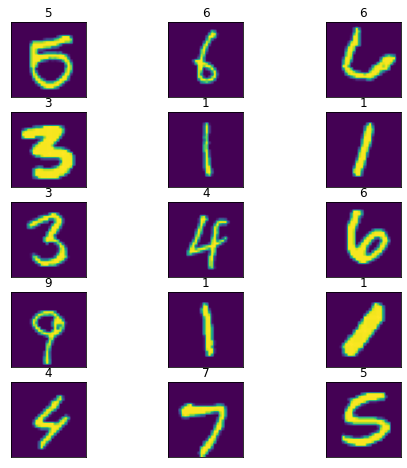

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(15):
            plt.subplot(5,3,i+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(X_train[i])
            plt.title(Y_train[i])
plt.show()

# Your code

Plot statistics of the training and testing dataset  
(`x axis`: digits, `y axis`: number of samples corresponding to the digits)

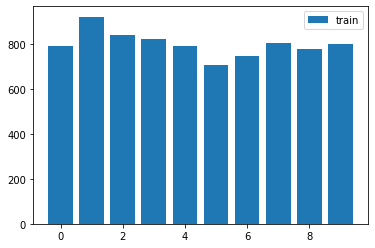

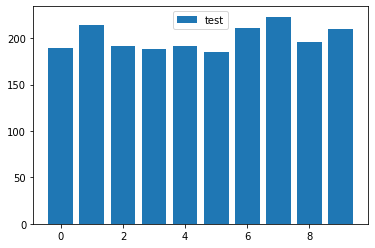

In [23]:
import numpy as np
values1, counts1 = np.unique(Y_train, return_counts=True)
plt.bar(values1,counts1,label='train')
plt.legend()
plt.show()
values1, counts1 = np.unique(Y_test, return_counts=True)
plt.bar(values1,counts1,label='test')
plt.legend()
plt.show()
# Your code

## Model

In [24]:
# model building
import keras
from keras.models import Sequential
from keras import layers
model =keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()
# You are supposed to look at some CNN architectures and add convolutional layers along with MaxPooling, specifying the kernel size, pooling size, activation 


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

In [26]:
# Compile the model (add optimizers and metrics)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fit the model on the training data (specify validation_split, read about validation if new to you)
history = model.fit(X_train, Y_train, epochs=45,
                            validation_split=0.2)

Epoch 1/45


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


200/200 [==============================] - 1s 5ms/step - loss: 1.8835 - accuracy: 0.7772 - val_loss: 0.1622 - val_accuracy: 0.9544
Epoch 2/45
200/200 [==============================] - 1s 4ms/step - loss: 0.2876 - accuracy: 0.9192 - val_loss: 0.1653 - val_accuracy: 0.9525
Epoch 3/45
200/200 [==============================] - 1s 4ms/step - loss: 0.1847 - accuracy: 0.9431 - val_loss: 0.1247 - val_accuracy: 0.9688
Epoch 4/45
200/200 [==============================] - 1s 4ms/step - loss: 0.1622 - accuracy: 0.9503 - val_loss: 0.1466 - val_accuracy: 0.9644
Epoch 5/45
200/200 [==============================] - 1s 4ms/step - loss: 0.1530 - accuracy: 0.9531 - val_loss: 0.1187 - val_accuracy: 0.9688
Epoch 6/45
200/200 [==============================] - 1s 4ms/step - loss: 0.1241 - accuracy: 0.9630 - val_loss: 0.0927 - val_accuracy: 0.9744
Epoch 7/45
200/200 [==============================] - 1s 4ms/step - loss: 0.1228 - accuracy: 0.9642 - val_loss: 0.1191 - val_accuracy: 0.9700
Epoch 8/45
200/20

## Predict some images
Print the image along with its label (true value) and predicted value.

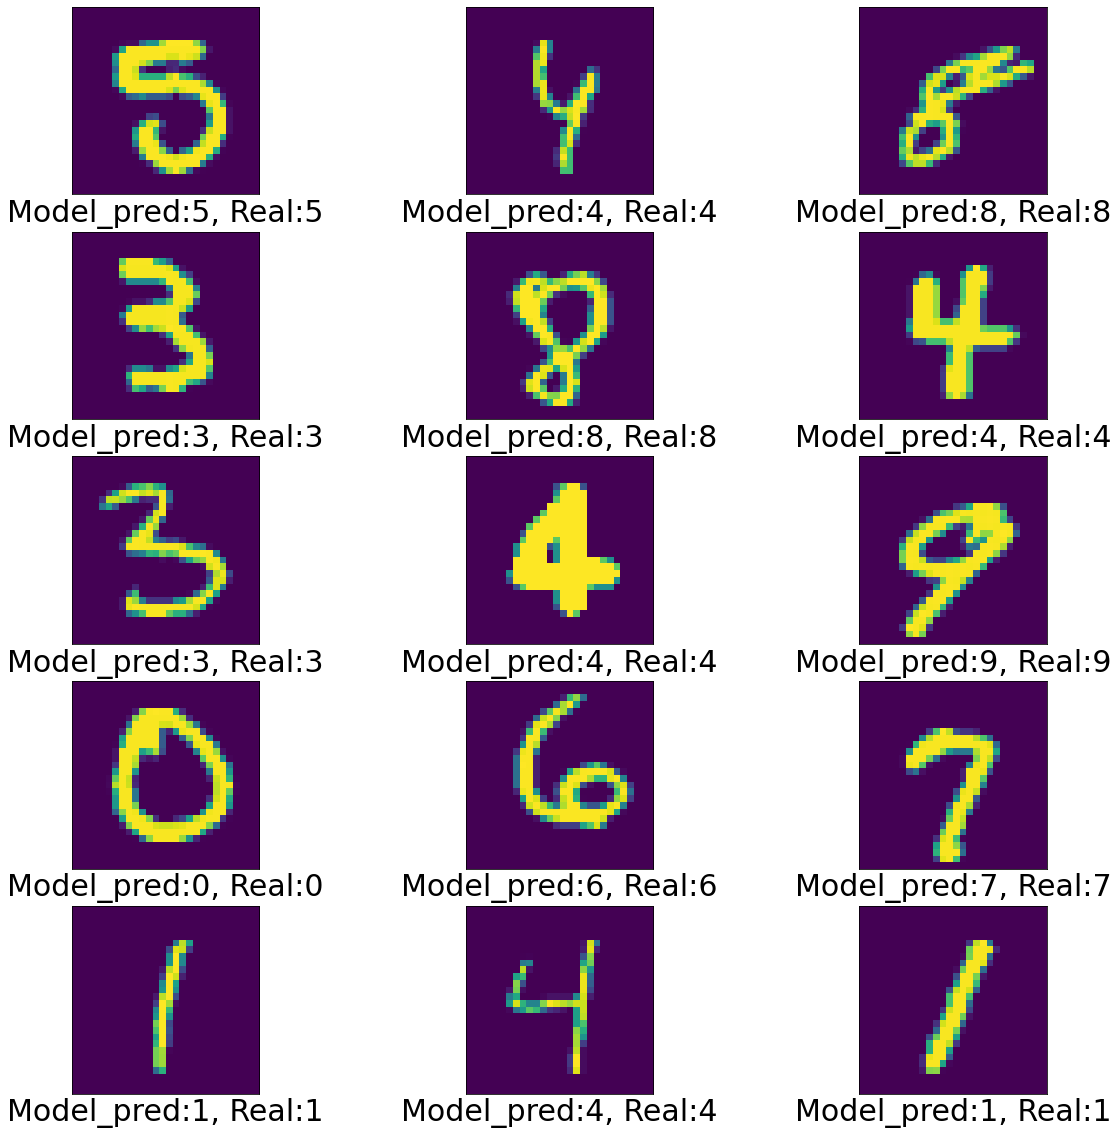

In [27]:
# Your code
pred=np.argmax(model.predict(X_test),axis=1)
plt.figure(figsize=(20,20))
for i in range(15):
  plt.subplot(5,3,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_test[i])
  plt.xlabel("Model_pred:{}, Real:{}".format(pred[i],Y_test[i]),fontsize=30)